In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rn

from scipy import stats

seed = 42
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
df=pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
xx=pd.DataFrame(df.isnull().sum(),columns=["No of nan values"])
xx

,No of nan values
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [5]:
df[df["Alcohol"].isnull()]["Year"].value_counts()

Year
2015    177
2005      2
2013      2
2014      1
2012      1
2011      1
2010      1
2009      1
2008      1
2007      1
2006      1
2004      1
2003      1
2002      1
2001      1
2000      1
Name: count, dtype: int64

In [6]:
df.columns = [x.strip() for x in df.columns]


In [7]:
print(df["Life expectancy"].mean())
print(df["Life expectancy"].median())

69.22493169398908
72.1


In [8]:
df[df["Life expectancy"].isnull()][["Year","Country"]]
#looks like most missing values were found in 2013

,Year,Country
624,2013,Cook Islands
769,2013,Dominica
1650,2013,Marshall Islands
1715,2013,Monaco
1812,2013,Nauru
1909,2013,Niue
1958,2013,Palau
2167,2013,Saint Kitts and Nevis
2216,2013,San Marino
2713,2013,Tuvalu


In [9]:
df[df["Adult Mortality"].isnull()][["Year","Country"]]
#same with Adult mortality

,Year,Country
624,2013,Cook Islands
769,2013,Dominica
1650,2013,Marshall Islands
1715,2013,Monaco
1812,2013,Nauru
1909,2013,Niue
1958,2013,Palau
2167,2013,Saint Kitts and Nevis
2216,2013,San Marino
2713,2013,Tuvalu


In [10]:
life_expentancy_in_2013=df.groupby("Year")["Life expectancy"].agg("mean")[2013]
df['Life expectancy'] = df['Life expectancy'].fillna(life_expentancy_in_2013)
Adult_Mortality_in_2013=df.groupby("Year")["Adult Mortality"].agg("mean")[2013]
df['Adult Mortality'] = df['Adult Mortality'].fillna(Adult_Mortality_in_2013)
Alcohol_in_2015=df.groupby("Year")["Alcohol"].agg("median")[2015]
df['Alcohol'] = df['Alcohol'].fillna(Alcohol_in_2015)
Total_expenditure_in_2015=df.groupby("Year")["Total expenditure"].agg("mean")[2015]
df['Total expenditure'] = df['Total expenditure'].fillna(Total_expenditure_in_2015)

In [11]:
df[df["Alcohol"].isnull()]["Year"].value_counts()
#let's replace it with the median alcohol value to prevent any statistical errors

Series([], Name: count, dtype: int64)

In [12]:
pd.DataFrame(data=round(df.isnull().sum()/len(df)*100,2),columns=["percentage of missing value"])

,percentage of missing value
Country,0.00
Year,0.00
Status,0.00
Life expectancy,0.00
Adult Mortality,0.00
infant deaths,0.00
Alcohol,0.00
percentage expenditure,0.00
Hepatitis B,18.82
Measles,0.00


<Axes: >

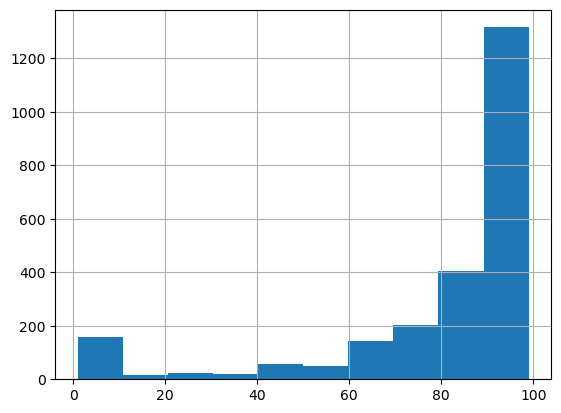

In [13]:
df["Hepatitis B"].hist(bins=10)

In [14]:
num_columns=df.select_dtypes(include=["int","float"]).columns

In [15]:
for cols in num_columns:
    df[cols]=df[cols].fillna(df[cols].median())

In [16]:
pd.DataFrame(df.isnull().sum(),columns=["No of nan values"])

,No of nan values
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


# Visulaizations

In [17]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


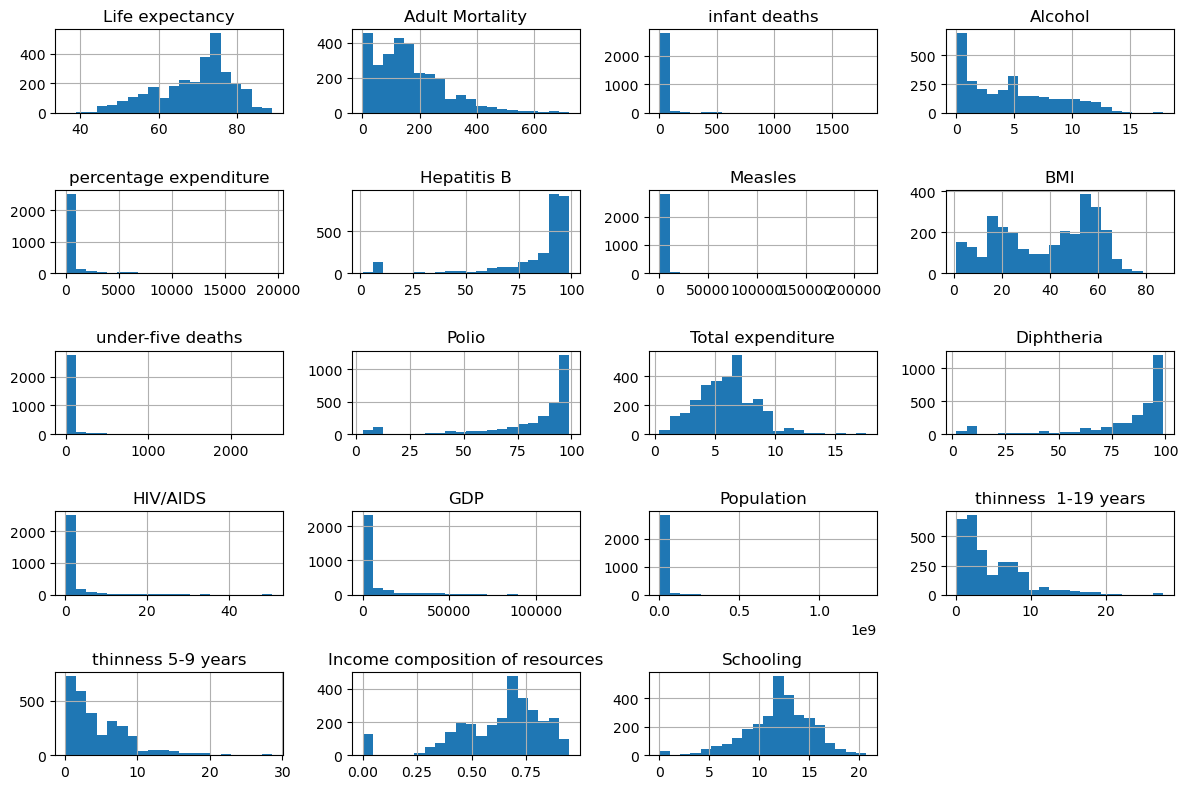

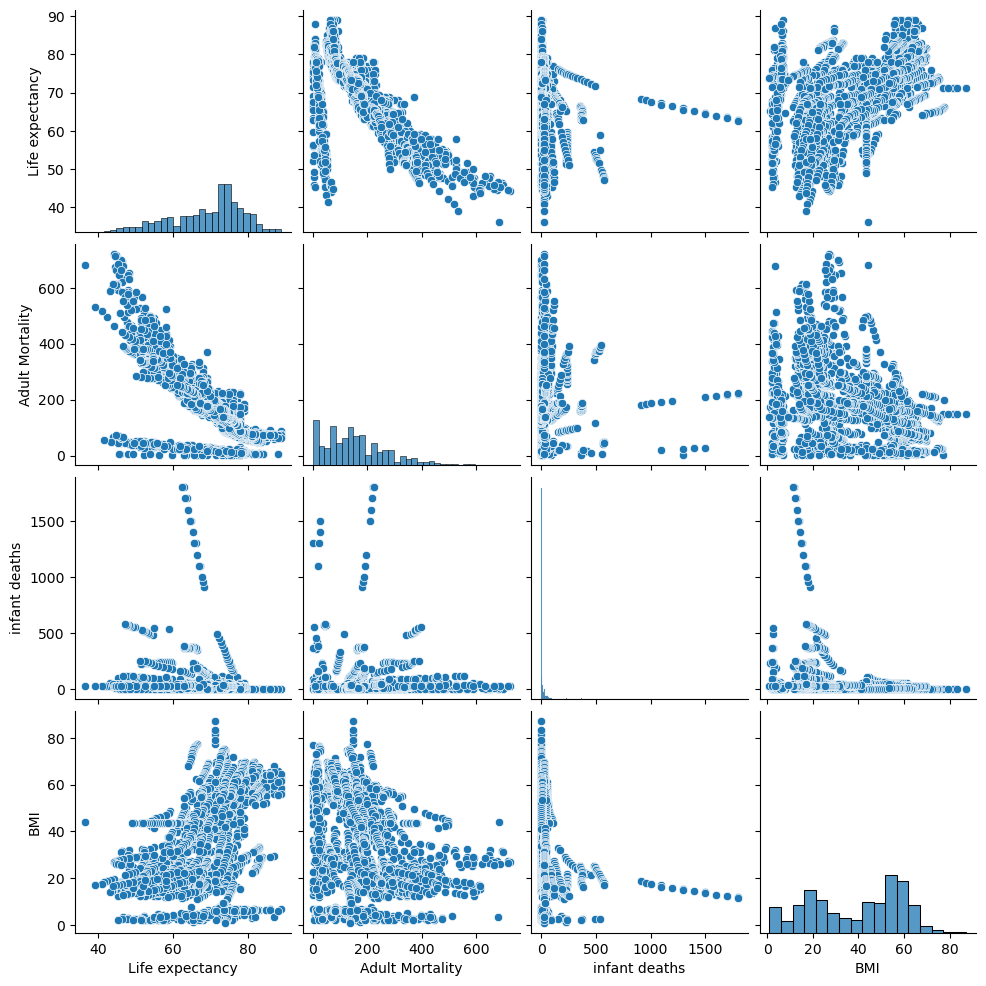

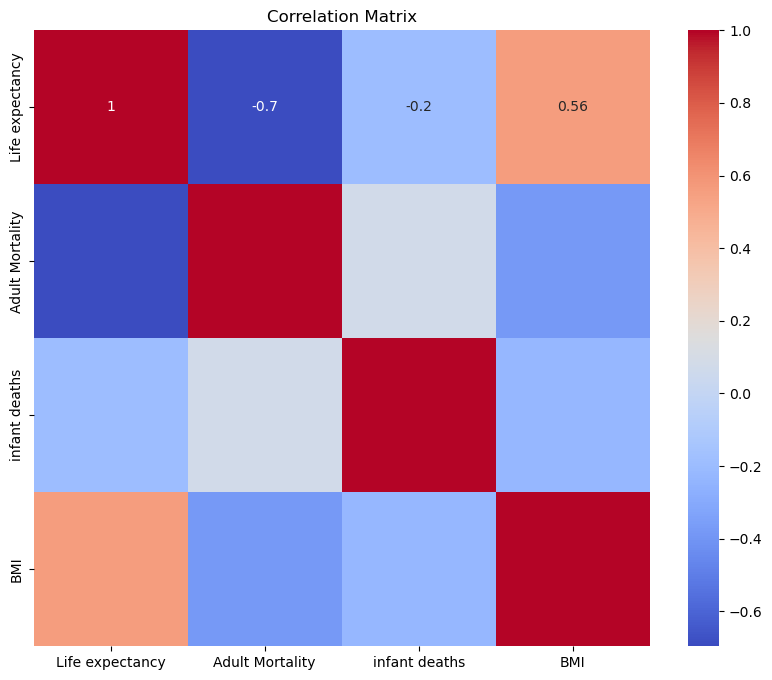

In [18]:
numerical_cols = ['Life expectancy', 'Adult Mortality', 'infant deaths', 'BMI']
numerical_cols2= df.columns[3:]

# Remove leading/trailing spaces from column names

# Plot histograms of numerical variables
df[numerical_cols2].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Plot scatter matrix to visualize relationships between numerical variables
sns.pairplot(df[numerical_cols])
plt.show()

# Compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import Lars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RANSACRegressor
linear=LinearRegression()
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import HuberRegressor
standard=MinMaxScaler()
alpha = 1.0  # Regularization strength
ridge_model = Ridge(alpha=alpha)
alpha = 0.1  # Regularization strength
lasso_model = Lasso(alpha=alpha)
bayesian_ridge = BayesianRidge()
ard_regression = ARDRegression()
lars = Lars()
rann=RANSACRegressor()
huber=HuberRegressor()
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=5) 
passive_aggressive_regressor = PassiveAggressiveRegressor(C=1.0, max_iter=1000, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=0)
ran=RandomForestRegressor(n_estimators=20)
bag=BaggingRegressor()
gradient=GradientBoostingRegressor(learning_rate=0.1,n_estimators=10)
hist=HistGradientBoostingRegressor(learning_rate=0.1,l2_regularization=0.1)
ada=AdaBoostRegressor(n_estimators=10,learning_rate=0.2,random_state=40)
knn=KNeighborsRegressor(n_neighbors=10)
el=ElasticNet(alpha=0.1)
Quantile=QuantileRegressor()
svm=SVR()

In [20]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<Axes: >

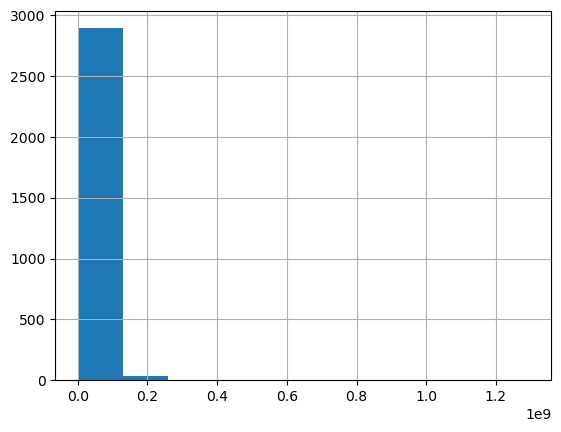

In [21]:
df["Population"].hist(bins=10)

In [22]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [23]:
import pandas as pd
import numpy as np

def cap_outliers(df, threshold=1.5):
    df_capped = df.copy()
    numeric_columns = df.select_dtypes(include=[np.number]).columns[2:]
    for column in numeric_columns:
        Q1 = df_capped[column].quantile(0.25)
        Q3 = df_capped[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # Cap outliers
        df_capped[column] = np.where(df_capped[column] < lower_bound, lower_bound, df_capped[column])
        df_capped[column] = np.where(df_capped[column] > upper_bound, upper_bound, df_capped[column])
    
    return df_capped


df_capped = cap_outliers(df)




In [24]:

num_col=['Country', 'Status']
pd.get_dummies(df_capped,num_col,drop_first=True)

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for cols in num_col:
    df_capped[cols]=label.fit_transform(df_capped[cols])

x=df_capped.drop("Life expectancy",axis=1)
y=df_capped["Life expectancy"]



In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=50)


x_train=standard.fit_transform(x_train)
x_test=standard.transform(x_test)

In [26]:
def get_score(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    score=model.score(x_test,y_test)
    return score*100

print("These are the accuracy scores for the Testing data  \n")
print(f' For Linear Regression Algorithm, we had an accuracy of {get_score(linear)}')
print(f' For  Ridge Algorithm, we had an accuracy of {get_score(ridge_model)}')
print(f' For Lasso Regression Algorithm, we had an accuracy of {get_score(lasso_model)}')
print(f' For Bayesian Algorithm, we had an accuracy of {get_score(bayesian_ridge)}')
print(f' For ARDRegression Algorithm, we had an accuracy of {get_score(ard_regression)}')
print(f' For Lars Algorithm, we had an accuracy of {get_score(lars)}')
print(f' For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of {get_score(omp)}')
print(f' For Passive Aggression Regressor Algorithm, we had an accuracy of {get_score(passive_aggressive_regressor)}')
print(f' For Decision TreeRegressor Algorithm, we had an accuracy of {get_score(dt_regressor)}')
print(f' For Random Forest Regressor Algorithm, we had an accuracy of {get_score(ran)}')
print(f' For Gradient Boost Regressor Algorithm, we had an accuracy of {get_score(gradient)}')
print(f' For Hist Regressor Algorithm, we had an accuracy of {get_score(hist)}')
print(f' For Adaboost Forest Regressor Algorithm, we had an accuracy of {get_score(ada)}')
print(f' For KNN Regressor Algorithm, we had an accuracy of {get_score(knn)}')
print(f' For Elastic Net Algorithm, we had an accuracy of {get_score(el)}')
print(f' For SVR Algorithm, we had an accuracy of {get_score(svm)}')
print(f' For HuberRegressor Algorithm, we had an accuracy of {get_score(huber)}')
print(f' For RANSACRegressor Algorithm, we had an accuracy of {get_score(rann)}')


These are the accuracy scores for the Testing data  

 For Linear Regression Algorithm, we had an accuracy of 84.71499372964557
 For  Ridge Algorithm, we had an accuracy of 84.48419623346146
 For Lasso Regression Algorithm, we had an accuracy of 83.6127364360767
 For Bayesian Algorithm, we had an accuracy of 84.51834579347477
 For ARDRegression Algorithm, we had an accuracy of 84.71593500398858
 For Lars Algorithm, we had an accuracy of 84.71499372964557
 For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of 79.06922667920995
 For Passive Aggression Regressor Algorithm, we had an accuracy of 76.71289656622132
 For Decision TreeRegressor Algorithm, we had an accuracy of 88.37278310821203
 For Random Forest Regressor Algorithm, we had an accuracy of 93.22609589903057
 For Gradient Boost Regressor Algorithm, we had an accuracy of 76.03211780418667
 For Hist Regressor Algorithm, we had an accuracy of 94.19788764309045
 For Adaboost Forest Regressor Algorithm, we had an accuracy

SINCE HIST REGRESSOR AND RANDOM FOREST REGRESSOR GAVE US THE BEST ACCURRACY /SCORE, LET'S PERFORM HYPERPARAMETER TUNING ON IT

# FEATURE SELECTION ON HIST REGRESSOR 

before that let's perform future selection to identify the most important features or the features which greatly impact the 
dependent variable

In [28]:
importances_reg = ran.feature_importances_[0:6]
importances_reg

array([6.17190082e-03, 8.73517618e-03, 9.84156397e-05, 8.65697467e-02,
       8.66593657e-03, 6.86800754e-03])

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

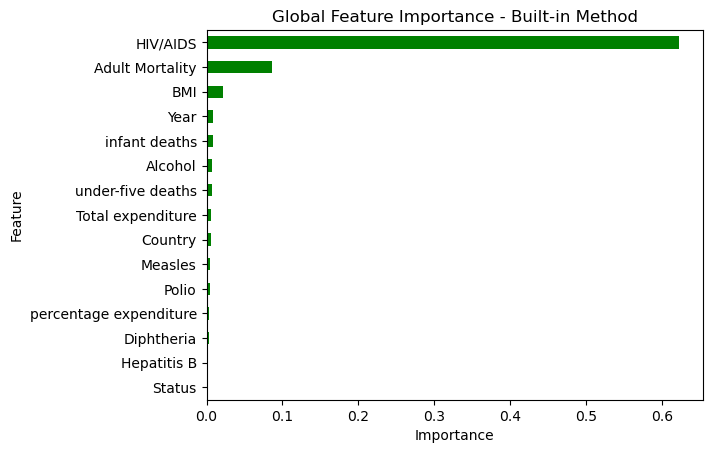

In [29]:
global_importances = pd.Series(ran.feature_importances_, index=x.columns)[0:15]
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [31]:
x_new=df_capped[['Status', 'Hepatitis B', 'Polio', 'Measles', 'percentage expenditure',
       'Diphtheria', 'Country', 'Alcohol', 'Total expenditure',
       'infant deaths', 'Year', 'under-five deaths', 'BMI', 'Adult Mortality',
       'HIV/AIDS']]


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.7,random_state=50)

In [33]:
def get_score(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    score=model.score(x_test,y_test)
    return score*100

print("These are the accuracy scores for the Testing data  \n")
print(f' For Linear Regression Algorithm, we had an accuracy of {get_score(linear)}')
print(f' For  Ridge Algorithm, we had an accuracy of {get_score(ridge_model)}')
print(f' For Lasso Regression Algorithm, we had an accuracy of {get_score(lasso_model)}')
print(f' For Bayesian Algorithm, we had an accuracy of {get_score(bayesian_ridge)}')
print(f' For ARDRegression Algorithm, we had an accuracy of {get_score(ard_regression)}')
print(f' For Lars Algorithm, we had an accuracy of {get_score(lars)}')
print(f' For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of {get_score(omp)}')
print(f' For Passive Aggression Regressor Algorithm, we had an accuracy of {get_score(passive_aggressive_regressor)}')
print(f' For Decision TreeRegressor Algorithm, we had an accuracy of {get_score(dt_regressor)}')
print(f' For Random Forest Regressor Algorithm, we had an accuracy of {get_score(ran)}')
print(f' For Gradient Boost Regressor Algorithm, we had an accuracy of {get_score(gradient)}')
print(f' For Adaboost Forest Regressor Algorithm, we had an accuracy of {get_score(ada)}')
print(f' For KNN Regressor Algorithm, we had an accuracy of {get_score(knn)}')
print(f' For Elastic Net Algorithm, we had an accuracy of {get_score(el)}')
print(f' For SVR Algorithm, we had an accuracy of {get_score(svm)}')
print(f' For HuberRegressor Algorithm, we had an accuracy of {get_score(huber)}')
print(f' For RANSACRegressor Algorithm, we had an accuracy of {get_score(rann)}')
print(f' For Hist Regressor Algorithm, we had an accuracy of {get_score(hist)}')




These are the accuracy scores for the Testing data  

 For Linear Regression Algorithm, we had an accuracy of 82.97974337581434
 For  Ridge Algorithm, we had an accuracy of 82.98979520881974
 For Lasso Regression Algorithm, we had an accuracy of 83.04470057715841
 For Bayesian Algorithm, we had an accuracy of 83.02216634535458
 For ARDRegression Algorithm, we had an accuracy of 81.94965466047418
 For Lars Algorithm, we had an accuracy of 81.08451578099461
 For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of 68.193791974074
 For Passive Aggression Regressor Algorithm, we had an accuracy of 66.74827041140078
 For Decision TreeRegressor Algorithm, we had an accuracy of 86.85617911130066
 For Random Forest Regressor Algorithm, we had an accuracy of 92.4355329150902
 For Gradient Boost Regressor Algorithm, we had an accuracy of 73.96446324275298
 For Adaboost Forest Regressor Algorithm, we had an accuracy of 81.98776542721396
 For KNN Regressor Algorithm, we had an accuracy of

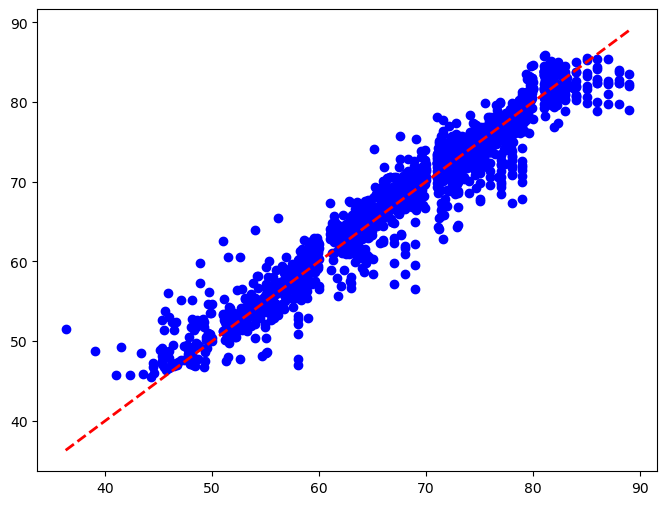

In [34]:
pred=hist.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test,pred, color='b', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')

# PREDICTIONS USING Hist Regressor Algorithm because it had the highest r2 score

# PREDICTION 1

In [35]:

prediction1 = x_test.loc[2174].values.reshape(1, -1) 
prediction1_life_expectancy = hist.predict(prediction1)
prediction1_life_expectancy

array([74.05905234])

# PREDICTION 2

In [36]:

prediction2 = x_test.loc[1193].values.reshape(1,-1)
prediction2_life_expectancy=hist.predict(prediction2)
prediction2_life_expectancy

array([66.51397401])

# PREDICTION 3

In [37]:
prediction3=x_test.loc[619].values.reshape(1,-1)
prediction3_life_expentancy=hist.predict(prediction3)
prediction3_life_expentancy

array([53.96313986])

# SAVING THE MODEL

In [38]:
import pickle
with open("hist_life_expentancy.pkl","wb") as f:
    pickle.dump(hist,f)

# LOADING THE MODEL THE MODEL

In [39]:
with open("hist_life_expentancy.pkl","rb") as f:
    loaded_model=pickle.load(f)

# PERFORMING PREDICTIONS WITH THE LOADED MODEL

In [40]:
zz=loaded_model.predict(prediction3)
print(zz)

array([53.96313986])